# Zero2Basic - Hash Functions
This post is intended to provide a quick introduction to hash functions and to discuss some practical applications of hashes in data mining and machine learning. As with my other Zero2Basic posts my aim is to provide a basic level of understanding of the concept and to demonstrate a real world use case.

Want to cut to the chase?<br> 
Heres how to implement a variety of common hash funcitons using [hashlib](https://docs.python.org/3/library/hashlib.html) in Python.

In [141]:
import hashlib

txt = "My first hash"
hash = hashlib.sha1() # avaliable hashes: md5(), sha1(), sha224(), sha256(), sha384(), and sha512()
hash.update(txt.encode()) # encode to product utf-8 bytes object
print(f'"{txt}"\t>sha1>\t"{hash.hexdigest()}"')

"My first hash"	>sha1>	"f367b9519a72e7c2c5452ed73705a66cc78fee6b"


Recently I was working on a text data-mining task at work. For context, the client had been keeping an unstructured and unmastered record of around 3 million contacts including customers, leads, contacts, etc. To make matters worse they were adding some 5000+ entries to this list per day. Whilst they are in the process of investing in a master data management solution, this is not going to be implemented for some time and will do little to resolve the 20 year backlog of noisy data and that is critical for continued business operation.<br><br>

Ok so this isnt my irst rodeo. Let's face it, messy data is everywhere in business. Most people working as data engineers, analysts, scientists and machine learners are likely familar with this problem and fortunately there is an aresenal tools at our disposal. Including: text manipulation and standardisation [e.g. cleanco, regex](); clustering ["post on clustering"](); and machine learning techniques[entitiy resolution, record linkage and de-duplication]().I need to write a post on those [duke, dedupe, zentity]().<br><br>
For my scenario I needed a a solution that could: i) create a unique identifier of each record, and ii) be used to efficiently indicate wether or not any new records were duplicates of exisiting ones. Cue a hash function.


### So what is a hash function?
*"A hash function is a deterministic function that maps inputs of arbitrary sizes to outputs of a fixed size." [Wiki](https://en.wikipedia.org/wiki/Hash_function)*<br> 
Some important properties of Hash functions are:
 - They are quick to compute.
 - They are determistic, i.e. they are non-random and repeatable. 
 - Even if the inputs are similar such as "ABC" and "ACB", the outputs should be uncorrelated.
 - It is practically infeasible to predict the output of a hash function, or to [reverse](https://crypto.stackexchange.com/questions/45377/why-cant-we-reverse-hashes) a hash value to its original value.
 - They can map an infinite number of inputs, and of any length, to outputs of fixed length.
 - Therefore a hash function generates a finite number of outputs. Longer hash functions having more possible outputs. 
 
### What are they used for?
Common hash function [applications](https://en.wikipedia.org/wiki/Hash_function#Uses) include cryptography and creating hash-tables for indexing and searching data.<br><br>
For instance, when performing a query on a database for the string "Apple Computer", a hash may be used to create a hash-table that can be used to quickly indicate the records that contain the substring "A" or "Apple" or "Computer". Boolean operations are computationally cheap and therefore hash-tables greatly reduce the search space to a subset list of candidate records. Avoiding the need to evaluate every single record in the database. A [hash-table](https://en.wikipedia.org/wiki/Hash_function#Hash_tables) is simply a table of boolean values (True or False) for wether or not a string contains a substring or not - or rather the hash of the string or substring. <br><br>
In cryptogrpahy, a hash function may be used to convert a bank account holders raw password (e.g. "Mittens1998") to a hash value. The banks website and mobile applications each use the same hash function and therefore the bank only needs to keep a record of the password's hash value, never revealing the users password to anyone not even the bank. The login system applies the same hash function to every password entered and so even if someone were to leak the hashed values of the user passwords, these would be converted to another hash value if they were used to login.<br><br>
Subsequently the Hash functions that are generally suitable for application to information retrieval, text mining and data indexing are  quite different [crytogrpahic hash functions](https://en.wikipedia.org/wiki/Cryptographic_hash_function).
<br><br>
So lets begin.

As above we'll use the [sha-1](https://en.wikipedia.org/wiki/SHA-1) hash function.

 - sha-1 hash values are 160 binary bits in length.
 - The hash values are typically written as a 40 digit hexidecimal string.
 - A single hexidecimal character can only represent 16 different values e.g. "0" = the 4 binary bits "0000" (see the [wiki on hexidecimals]([hexidecimal](https://en.wikipedia.org/wiki/Hexadecimal))).
 - Therefore there are a total $2^{160} = 16^{40}$ sha-1 hash values in existance. Or
 
*"one quindecillion, four hundred sixty-one quattuordecillion, five hundred one tredecillion, six hundred thirty-seven duodecillion, three hundred thirty undecillion, nine hundred two decillion, nine hundred eighteen nonillion, two hundred three octillion, six hundred eighty-four septillion, eight hundred thirty-two sextillion, seven hundred sixteen quintillion, two hundred eighty-three quadrillion, nineteen trillion, six hundred fifty-five billion, nine hundred thirty-two million, five hundred forty-two thousand, nine hundred seventy-six"*[rbn](http://www.mathcats.com/explore/reallybignumbers.html)

Thats a lot! Surely we would never find a duplicate? Would we? More on that in a minute.

Lets also wrap the hash in a function that allows us to slice the hash to a given length. 


In [154]:
import hashlib

def hash_of_length(txt, length=40):
    """Function to sha-256 hash strings to a certain length"""
    hash = hashlib.sha1()
    hash.update(txt.encode())
    return hash.hexdigest()[:length]

In [155]:
# define some strings to test
some_people = ['Bob Iger','bob iger','bob seager','bob dole','bod geldoff','bob marley','bob ross','bob dylan','alan jackson']
hashes = list()

# hash the strings
for name in some_people:
    hash_ = hash_of_length(name)
    hashes.append(hash_)
    print(f'"{name}"\t>sha1>\t"{hash_}"')

"Bob Iger"	>sha1>	"175aa5c4ad84e07322d1e6d569c76af0fa1f40e1"
"bob iger"	>sha1>	"46132fd9df433a3b6171511c4f27efcae283a1a0"
"bob seager"	>sha1>	"137b17bdfdd8e0ec7194b8213734ea1fcaf33a2b"
"bob dole"	>sha1>	"92fbeb33968659b487521261436f590f2dbf16bc"
"bod geldoff"	>sha1>	"05a3abd740c56c88c2042000b57894f71b0fef28"
"bob marley"	>sha1>	"7d8e97df8cd7d090da958fe7779924785b0baa06"
"bob ross"	>sha1>	"4cf9d0f31cd664b4174ad5699d9700b1e38da01b"
"bob dylan"	>sha1>	"bc85844ebeb428aa23e8d822d800df18e32fff13"
"alan jackson"	>sha1>	"355dce7e8e09cb6dc07d45b77c4c36942eca140e"


Ok we have sucessfully hashed our initial list of name strings.<br>
Some time passes and we receive some new names in our list. Lets hash these and examine all the names in a table. 

In [156]:
some_more_people = ['Bob Iger','bob iger','Bob Dylan']

# hash the strings
for name in some_more_people:
    hash_ = hash_of_length(name)
    hashes.append(hash_)

In [157]:
import pandas as pd

# create a df of the strings and hashes
df = pd.DataFrame({'name':some_people+some_more_people,'hash':hashes})

# add an id field for unique hash values
df['id'] = pd.factorize(df['hash'])[0]
df.sort_values(by='id')[:10]

,name,hash,id
0,Bob Iger,175aa5c4ad84e07322d1e6d569c76af0fa1f40e1,0
9,Bob Iger,175aa5c4ad84e07322d1e6d569c76af0fa1f40e1,0
1,bob iger,46132fd9df433a3b6171511c4f27efcae283a1a0,1
10,bob iger,46132fd9df433a3b6171511c4f27efcae283a1a0,1
2,bob seager,137b17bdfdd8e0ec7194b8213734ea1fcaf33a2b,2
3,bob dole,92fbeb33968659b487521261436f590f2dbf16bc,3
4,bod geldoff,05a3abd740c56c88c2042000b57894f71b0fef28,4
5,bob marley,7d8e97df8cd7d090da958fe7779924785b0baa06,5
6,bob ross,4cf9d0f31cd664b4174ad5699d9700b1e38da01b,6
7,bob dylan,bc85844ebeb428aa23e8d822d800df18e32fff13,7


We can see that some idenitical names were found for "bob iger" and "Bob Iger". Maybe this a purchase list of rights to Marvel comics?<br>

We could also improve our system by applying some typical text standardization steps such as:
 - make each string lowercase.
 - removing any trailing or double white space.
 - folding any special characters to ASCII characters.
 
In addition, if this were a very large list we might look to split each the strings to first and last name and hash those values too. This would allow us to efficiently locate all of the records with first name "bob" or with the last name "ross" etc. Then we would have a pretty good system to detect duplicates and to search a large number of records.

But wait a minute, arn't we adding overhead and computation time by converting our raw strings to longer 160 bit / 40 character strings, why not just compare the raw strings? 

Well sure and many of our names are indeed less than 40 characters long. Remember we wrote our hash function with the option to slice the hash value to a given length.

### [Birthday Problem](https://stackoverflow.com/questions/30561096/chance-of-a-duplicate-hash-when-using-first-8-characters-of-sha1)
[example of how it was broken](https://pthree.org/2014/03/06/the-reality-of-sha1/)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
p=0.999999
i = 8.0
d = 16**i
collision = np.sqrt(2*d*np.log(1/(1-p)))
print(f'For {int(collision)} items expect {p*100} % chance of collision using an {int(i)} length SHA1 hash')

For 344491 items expect 99.9999 % chance of collision using an 8 length SHA1 hash


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


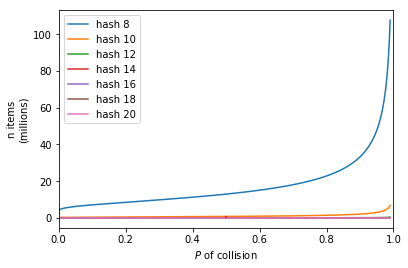

In [12]:
p = np.arange(0.01,1.01,0.001)

for k in np.arange(8,22,2):
    de = 16**float(k)
    plt.plot(1-p,[1000000/np.sqrt(2*de*np.log(1/(1-i))) for i in p], label='hash {}'.format(k))

plt.plot([0.5,0.5],[0,1],'r--')
plt.xlabel('$P$ of collision')
plt.ylabel('n items\n(millions)')
plt.xlim(0,1)
#plt.ylim(0,.5)
plt.legend();

# What about a more secure hash?
[sha-2 / sha256](https://en.wikipedia.org/wiki/SHA-2).<br>
As the name suggests the generated hash is 256 bits long, creating a 64 character length string on digest (4 bits per character).
https://crypto.stackexchange.com/a/47810/69609

# Method 1
- Internal python **hash()**
- Doesnt work. Python 3 seeds randomly on each instance

In [3]:
[hash(name) for name in names]

[9192664141695842138,
 873138748646001139,
 7972014826130490917,
 5191281310066151820,
 -6811530580621357639]

In [4]:
# post restart kernel
[hash(name) for name in names]

[9192664141695842138,
 873138748646001139,
 7972014826130490917,
 5191281310066151820,
 -6811530580621357639]

In [13]:
hash("a")

-7944755250772420503

# [Method 2](https://stackoverflow.com/questions/31701991/string-of-text-to-unique-integer-method)

 - two-way hash
 - not secure

In [9]:
import math
def convertToNumber (s):
    return int.from_bytes(s.encode(), byteorder='little')

def convertFromNumber (n):
    return n.to_bytes(math.ceil(n.bit_length() / 8), byteorder='little').decode()

In [10]:
names_bytes = [convertToNumber(name) for name in names]
names_bytes

[8243108394184437602,
 540220349545388005551970,
 7308338771146207074,
 123,
 3355185]

In [11]:
# test single
(123).to_bytes(math.ceil((123).bit_length() / 8), byteorder='little').decode()

'{'

In [12]:
[convertFromNumber(name) for name in names_bytes]

['bog iger', 'bob seager', 'bob dole', '{', '123']